In [398]:
import numpy as np
import pandas as pd

In [399]:
df = pd.read_csv("spam.csv" ,encoding='ISO-8859-1',usecols=['v1','v2'])

In [400]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [401]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [402]:
from sklearn.preprocessing import LabelEncoder

In [403]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [404]:
encoder = LabelEncoder()

df['target']=encoder.fit_transform(df['target'])

In [295]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [296]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [405]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

In [406]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Jroam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


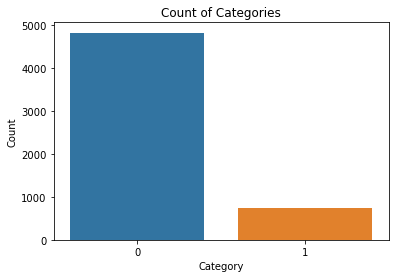

In [299]:
sns.countplot('target',data=df)

plt.title('Count of Categories')
plt.xlabel('Category')
plt.ylabel('Count')

plt.show()

In [407]:
df[df['target']==1]

,target,text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


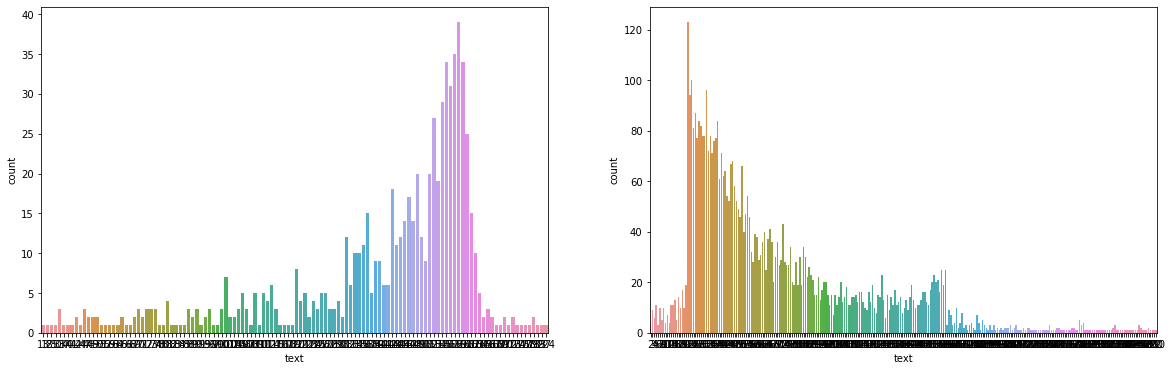

In [301]:

fig, axes = plt.subplots(1, 2, figsize=(20, 6))  #

sns.countplot(x = df[df['target']==1]['text'].str.len(),data=df,ax=axes[0])
sns.countplot(x = df[df['target']==0]['text'].str.len(),data=df,ax=axes[1])


# Show the plot
plt.show()


In [408]:
spam = df[df['target']==1]['text'].str.len()
ham = df[df['target']==0]['text'].str.len()


In [409]:
df[df['target']==1]['text'].describe()

count                                                   747
unique                                                  653
top       Please call our customer service representativ...
freq                                                      4
Name: text, dtype: object

In [410]:
df[df['target']==0]['text'].describe()

count                       4825
unique                      4516
top       Sorry, I'll call later
freq                          30
Name: text, dtype: object

In [411]:
df[df['target']==1]['target']

2       1
5       1
8       1
9       1
11      1
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: target, Length: 747, dtype: int32

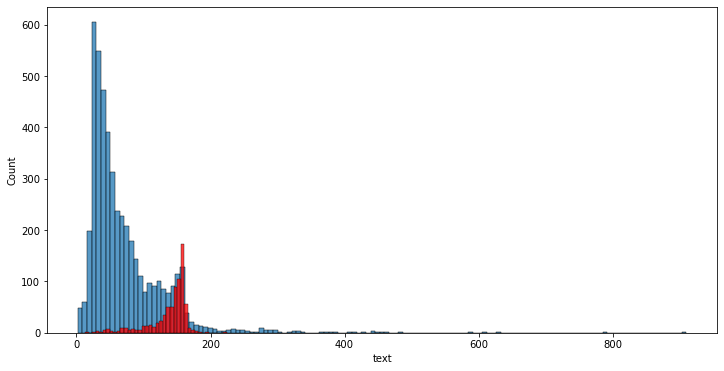

In [306]:
plt.figure(figsize=(12, 6))
sns.histplot(x =ham,data=df)
sns.histplot(x =spam,data=df,color='red')
plt.show()

In [412]:
d = df['text'].str.split('/')

In [413]:
df['number_of_words']=df['text'].str.split(' ').str.len()
df['number_of_letters']=df['text'].str.len()


In [309]:
df

,target,text,number_of_words,number_of_letters
0,0,"Go until jurong point, crazy.. Available only ...",20,111
1,0,Ok lar... Joking wif u oni...,6,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,0,U dun say so early hor... U c already then say...,11,49
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,30,161
5568,0,Will Ì_ b going to esplanade fr home?,8,37
5569,0,"Pity, * was in mood for that. So...any other s...",10,57
5570,0,The guy did some bitching but I acted like i'd...,26,125


In [414]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [415]:
df['number_of_words']= df['text'].apply(lambda x: len(word_tokenize(x)))

In [416]:
df['number_of_sentence']= df['text'].apply(lambda x: len(sent_tokenize(x)))

In [417]:
df[df['target']==0][['number_of_sentence','number_of_words','number_of_letters']].describe()


,number_of_sentence,number_of_words,number_of_letters
count,4825.000000,4825.000000,4825.000000
mean,1.808705,17.271917,71.023627
std,1.328227,13.988885,58.016023
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,33.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,92.000000
max,28.000000,220.000000,910.000000


In [418]:
df[df['target']==1][['number_of_sentence','number_of_words','number_of_letters']].describe()


,number_of_sentence,number_of_words,number_of_letters
count,747.000000,747.000000,747.000000
mean,3.017403,27.891566,138.866131
std,1.528449,6.867007,29.183082
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,132.500000
50%,3.000000,29.000000,149.000000
75%,4.000000,32.000000,157.000000
max,8.000000,46.000000,224.000000


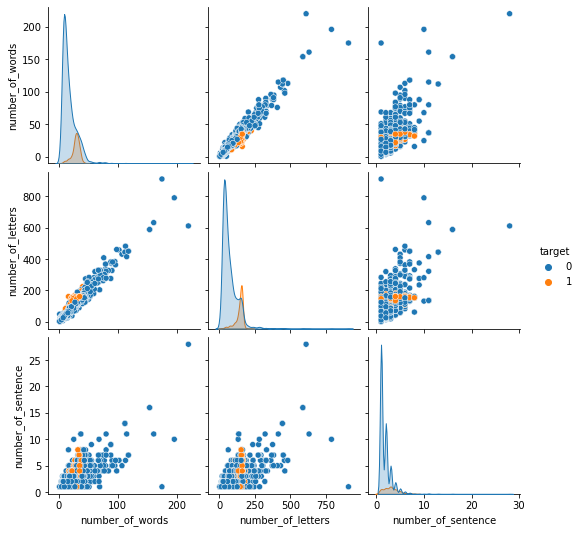

In [419]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

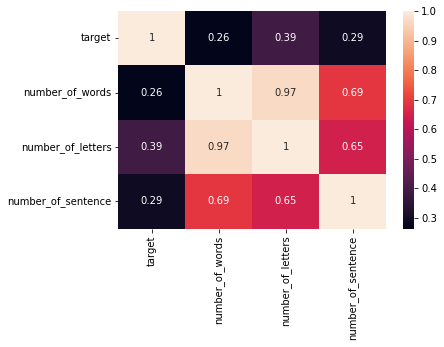

In [420]:
sns.heatmap(df.corr(),annot=True)

In [421]:
import string
from nltk.stem import PorterStemmer

# Text Preprocessing

- Lower case
- Tokenization
- Removing Special charcter
- Removing stop words and punctuation
- stemming

In [422]:
def dataPreprocessing(text):
    # lower case
    text = text.lower() 

    # word tokenise
    y=[]
    text= word_tokenize(text)
    
    for i in text:
        if i.isalnum(): 
         y.append(i)
    
    text = y
    y = []

    # remove stop words and punctuation
    for i in text:
       if i not in  stopwords.words('english') and i not in string.punctuation:
          y.append(i)
    text = y  
    y = []    

    # apply stemming
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    return ' '.join(y)

In [423]:
df['transformed_text']=df['text'].apply(dataPreprocessing)

In [320]:
df

,target,text,number_of_words,number_of_letters,number_of_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,161,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,9,37,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",15,57,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,27,125,1,guy bitch act like interest buy someth els nex...


# Create word cloud 

In [424]:
from wordcloud import WordCloud

In [425]:
spam_corpus = []
for i in df[df['target']==1]['transformed_text'].tolist():
   for text in i.split():
    spam_corpus.append(text)

len(spam_corpus)

11490

In [426]:
from collections import Counter

In [427]:
mcw  = Counter(spam_corpus).most_common(30)

In [428]:
df_mcw = pd.DataFrame(mcw)

c:\Users\Jroam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


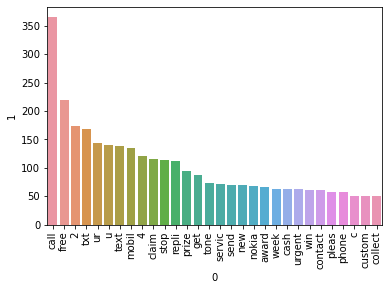

In [429]:
sns.barplot(df_mcw[0],df_mcw[1])
plt.xticks(rotation='vertical')
plt.show()

In [430]:
ham_corpus = []
for i in df[df['target']==0]['transformed_text'].tolist():
   for text in i.split():
    ham_corpus.append(text)

len(ham_corpus)

38205

c:\Users\Jroam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


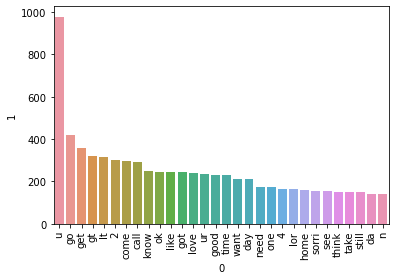

In [431]:
mcw  = Counter(ham_corpus).most_common(30)
df_mcw = pd.DataFrame(mcw)
sns.barplot(df_mcw[0],df_mcw[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [447]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfd = TfidfVectorizer(max_features=300)

In [448]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [449]:
y= df['target'].values

In [450]:
from sklearn.model_selection import train_test_split

In [451]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [453]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [454]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [455]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.873542600896861
0.5346938775510204
[[843 114]
 [ 27 131]]


In [456]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9713004484304932
0.9038461538461539
[[942  15]
 [ 17 141]]


In [457]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9695067264573991
0.9920634920634921
[[956   1]
 [ 33 125]]


In [458]:
X = tfd.fit_transform(df['transformed_text']).toarray()

In [459]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [460]:
y_pred1 = gnb.fit(X_train,y_train).predict(X_test)

print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.6959641255605381
0.3094736842105263
[[629 328]
 [ 11 147]]


In [461]:
y_pred2 = mnb.fit(X_train,y_train).predict(X_test)

print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9587443946188341
0.9827586206896551
[[955   2]
 [ 44 114]]


In [462]:
y_pred3 = gnb.fit(X_train,y_train).predict(X_test)

print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.6959641255605381
0.3094736842105263
[[629 328]
 [ 11 147]]


In [463]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [345]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [396]:
X = tfd.fit_transform(df['transformed_text'])
y= df['target']
X1_train,X1_test,y1_train,y1_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [385]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [387]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    # 'LR': lrc, 
    # 'RF': rfc, 
    # 'AdaBoost': abc, 
    # 'BgC': bc, 
    # 'ETC': etc,
    # 'GBDT':gbdt
   
}

In [388]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [379]:
train_classifier(svc,X1_train,y1_train,X1_test,y1_test)

(0.9704035874439462, 0.9844961240310077)

In [389]:
acc_score=[]
pre_score = []

for name,clf in clfs.items():
    print(name)
    current_accuracy,current_precision= train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    acc_score.append(current_accuracy)
    pre_score.append(current_precision)



SVC
For  SVC
Accuracy -  0.9659192825112107
Precision -  0.9761904761904762
KN
For  KN
Accuracy -  0.8986547085201794
Precision -  1.0
NB
For  NB
Accuracy -  0.957847533632287
Precision -  1.0
DT
For  DT
Accuracy -  0.9237668161434978
Precision -  0.8613861386138614


In [372]:
temp = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':acc_score,'Precision':pre_score}).sort_values('Precision',ascending=False)

In [373]:
temp

,Algorithm,Accuracy,Precision
1,KN,0.898655,1.000000
2,NB,0.957848,1.000000
8,ETC,0.973991,1.000000
5,RF,0.964126,0.983607
0,SVC,0.965919,0.976190
9,GBDT,0.942601,0.960784
4,LR,0.944395,0.944444
6,AdaBoost,0.953363,0.934426
7,BgC,0.958744,0.924242
3,DT,0.923767,0.854369


In [390]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':acc_score,'Precision_max_ft_3000':pre_score}).sort_values('Precision_max_ft_3000',ascending=False)

In [391]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.898655,1.000000
2,NB,0.957848,1.000000
0,SVC,0.965919,0.976190
3,DT,0.923767,0.861386


In [392]:
temp.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.898655,1.000000,0.898655,1.000000
1,NB,0.957848,1.000000,0.957848,1.000000
2,SVC,0.965919,0.976190,0.965919,0.976190
3,DT,0.923767,0.854369,0.923767,0.861386


In [464]:
import pickle
pickle.dump(tfd,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb') )